In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)
import subprocess

from lib import call, show_solution, show_solution_swap, show_solution_3D

Populating the interactive namespace from numpy and matplotlib


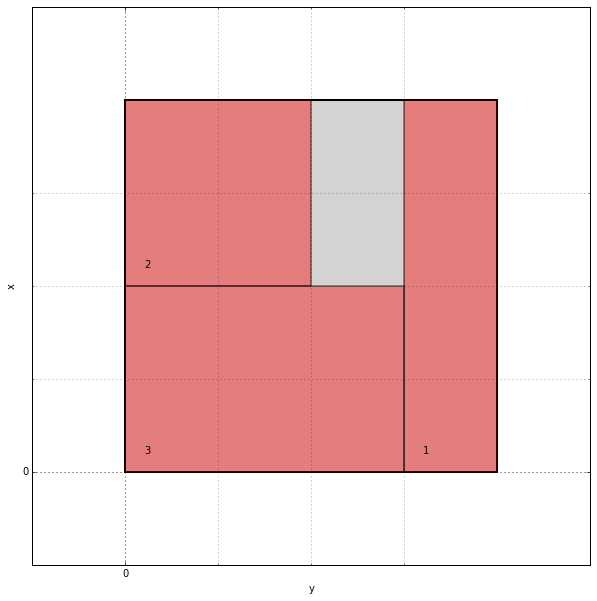

In [2]:
show_solution(*call("../data/datas", "-2"))

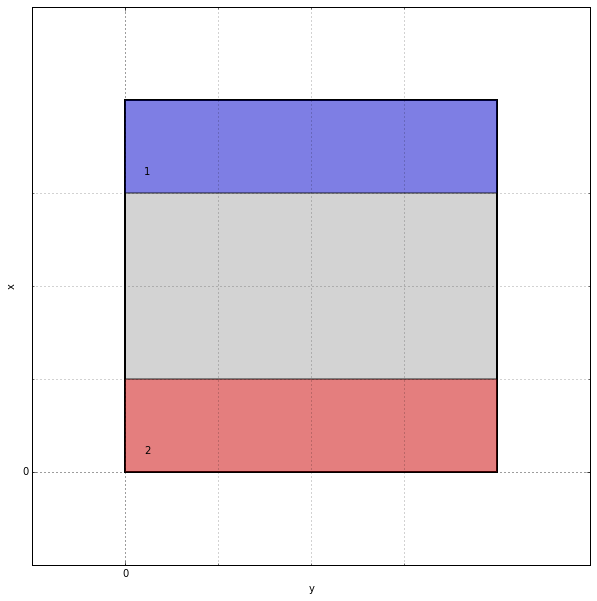

In [3]:
show_solution_swap(*call("../data/impossible", "-r"))

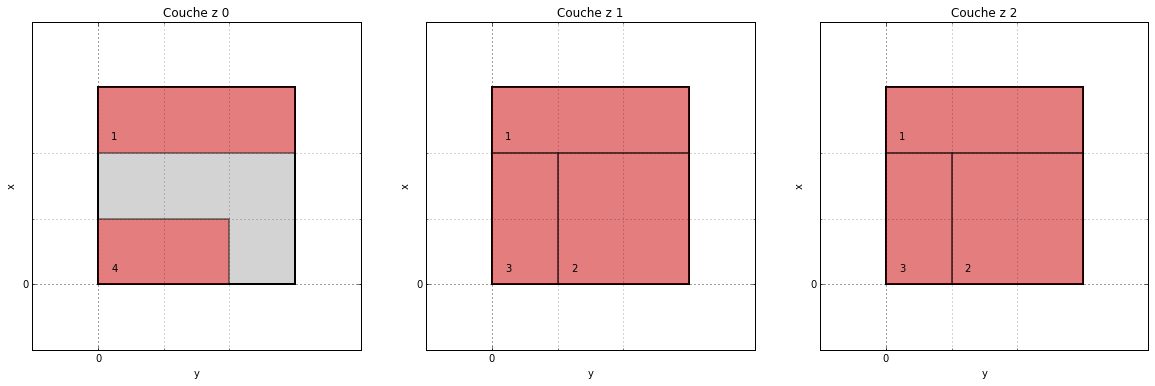

In [ ]:
show_solution_3D(*call("../data/3D", "-3"))

In [ ]:
show_solution(*call("../data/BENG06.TXT", "-2"))

In [ ]:
try:
    show_solution(*call("../data/impossible", "-2"))
except subprocess.CalledProcessError:
    print("No solution foud")

In [ ]:
show_solution_swap(*call("../data/BENG06.TXT", "-r"))